<a href="https://colab.research.google.com/github/Saoudyahya/CircuitsVis-vs-TransformerLens/blob/main/CircuitsVis_vs_TransformerLens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install circuitsvis transformer_lens torch numpy matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.4 MB/s eta 0:00:00
   ━

In [3]:
import torch
from transformer_lens import HookedTransformer
import circuitsvis as cv

# Load a small pre-trained GPT-2 model
model = HookedTransformer.from_pretrained("gpt2-small")

# Input text
text = "Artificial Intelligence is evolving rapidly."
tokens = model.tokenizer.encode(text, return_tensors="pt")

# Get attention patterns
with torch.no_grad():
    _, cache = model.run_with_cache(tokens)

# Extract attention from last layer
attention_patterns = cache["pattern", 11]  # Layer 11 (Last layer)

# Visualize attention head 0 (you can change to any head)
cv.attention.attention_patterns(
    tokens=model.tokenizer.convert_ids_to_tokens(tokens[0]),
    attention=attention_patterns[0].cpu().numpy(),
)

Loaded pretrained model gpt2-small into HookedTransformer


Loaded pretrained model gpt2-small into HookedTransformer


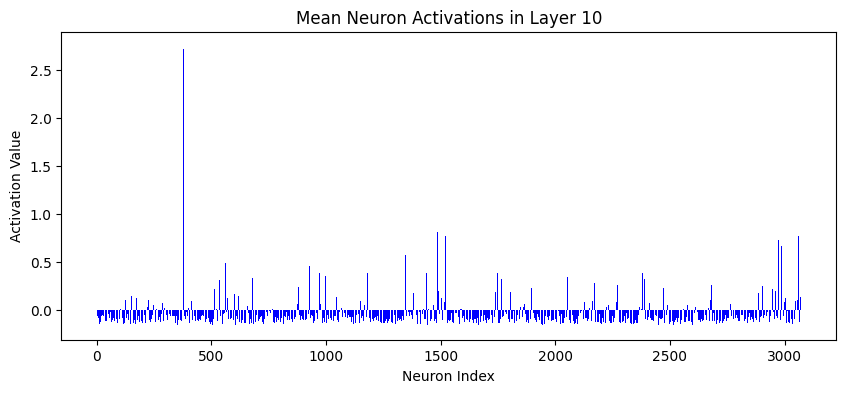

In [5]:
import torch
import transformer_lens
from transformer_lens import HookedTransformer
import matplotlib.pyplot as plt
import numpy as np

# Load GPT-2 model
model = HookedTransformer.from_pretrained("gpt2-small")

# Input text
text = "Deep learning models are powerful but complex."
tokens = model.tokenizer.encode(text, return_tensors="pt")

# Run model and cache activations
_, cache = model.run_with_cache(tokens)

# Get activations from MLP in layer 10
layer = 10
# Aggregate activations by averaging across tokens
mlp_activations_avg = mlp_activations.mean(axis=0)

# Plot activations
plt.figure(figsize=(10, 4))
plt.bar(range(len(mlp_activations_avg)), mlp_activations_avg, color="blue")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Value")
plt.title(f"Mean Neuron Activations in Layer {layer}")
plt.show()


In [ ]:
from transformer_lens.utils import get_logit_diff

# Compare probabilities of two words
prompt = "The capital of France is"
prob_diff = get_logit_diff(model, prompt, "Paris", "London")

print(f"Logit difference (Paris vs London): {prob_diff}")
